In [1]:
!pip install pandas numpy seaborn matplotlib tensorflow keras sklearn &> /dev/null

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet201

import time
start_time = time.time()

In [3]:
PATH_DATA_TRAIN = '../input/cars-data-ttv-80-10-10/data-raw/data-raw/train'
PATH_DATA_TEST = '../input/cars-data-ttv-80-10-10/data-raw/data-raw/test'
PATH_DATA_VALIDATION = '../input/cars-data-ttv-80-10-10/data-raw/data-raw/validation'
PATH_SAVED_MODEL = 'densenet201-imagenet.h5'

# Load Dataset As Generators

In [4]:
generator = ImageDataGenerator(rescale = 1./255.)

target_size = (100, 100)
batch_size = 32

train_batches = generator.flow_from_directory(
    PATH_DATA_TRAIN, class_mode='categorical', 
    batch_size=batch_size, target_size=target_size
)

validation_batches = generator.flow_from_directory(
    PATH_DATA_VALIDATION, class_mode='categorical',  
    batch_size=batch_size, target_size=target_size
)

test_batches = generator.flow_from_directory(
    PATH_DATA_TEST, class_mode='categorical', shuffle=False, 
    batch_size=batch_size, target_size=target_size
)

Found 12971 images belonging to 7 classes.
Found 1612 images belonging to 7 classes.
Found 1602 images belonging to 7 classes.


In [5]:
# preview data (batch size, width, height, colors)
print('x_train shape:', train_batches[0][0].shape)
print('x_validation shape:', validation_batches[0][0].shape)
print('x_test shape:', test_batches[0][0].shape)
print('y_train shape:', train_batches[0][1].shape)
print('y_validation shape:', validation_batches[0][1].shape)
print('y_test shape:', test_batches[0][1].shape)

x_train shape: (32, 100, 100, 3)
x_validation shape: (32, 100, 100, 3)
x_test shape: (32, 100, 100, 3)
y_train shape: (32, 7)
y_validation shape: (32, 7)
y_test shape: (32, 7)


In [6]:
# input & output shape
input_shape = train_batches[0][0][0].shape
output_shape = len(train_batches[0][1][0])

# display input & output shape
print('Input Shape:', input_shape)
print('Output Shape:', output_shape)

Input Shape: (100, 100, 3)
Output Shape: 7


# Build & Compile Model

In [7]:
model = DenseNet201(
    input_shape=input_shape, 
    weights="imagenet", 
    include_top=False, 
    pooling='max'
)

for layer in model.layers:
    layer.trainable = False

i = Input(shape=input_shape)
x = model(i)
x = Flatten()(x)
x = Dense(output_shape, activation='softmax')(x)

model = Model(inputs=i, outputs=x)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

2022-12-10 17:52:53.576032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 17:52:53.577111: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 17:52:53.890084: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 17:52:53.891037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-10 17:52:53.891827: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

74850304/74836368 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
densenet201 (Functional)     (None, 1920)              18321984  
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 13447     
Total params: 18,335,431
Trainable params: 13,447
Non-trainable params: 18,321,984
_________________________________________________________________


# Train Model

In [8]:
# train model
r = model.fit(train_batches, validation_data=validation_batches, epochs=100)

# save model
model.save(PATH_SAVED_MODEL)

# load model
# model = load_model(PATH_SAVED_MODEL)

2022-12-10 17:53:06.763375: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-12-10 17:53:18.423629: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


406/406 [==============================] - 282s 640ms/step - loss: 1.6941 - accuracy: 0.4447 - val_loss: 1.4517 - val_accuracy: 0.5019
Epoch 2/100
406/406 [==============================] - 142s 349ms/step - loss: 1.2385 - accuracy: 0.5433 - val_loss: 1.2939 - val_accuracy: 0.5397
Epoch 3/100
406/406 [==============================] - 145s 356ms/step - loss: 1.1307 - accuracy: 0.5858 - val_loss: 1.2719 - val_accuracy: 0.5459
Epoch 4/100
406/406 [==============================] - 140s 344ms/step - loss: 1.0805 - accuracy: 0.5977 - val_loss: 1.2206 - val_accuracy: 0.5881
Epoch 5/100
406/406 [==============================] - 141s 347ms/step - loss: 1.0312 - accuracy: 0.6159 - val_loss: 1.2531 - val_accuracy: 0.5577
Epoch 6/100
406/406 [==============================] - 140s 344ms/step - loss: 1.0106 - accuracy: 0.6223 - val_loss: 1.2579 - val_accuracy: 0.5434
Epoch 7/100
406/406 [==============================] - 140s 345ms/step - loss: 1.0103 - accuracy: 0.6182 - val_loss: 1.2495 - val_

# Evaluate Model's Training & Validation Results

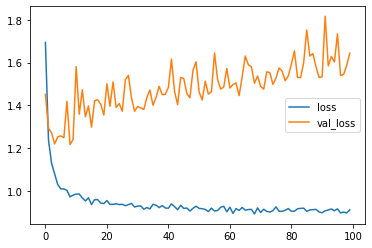

In [9]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

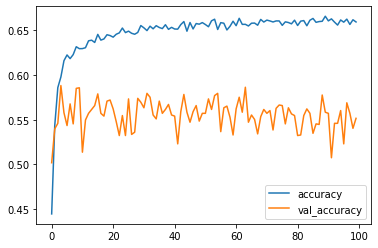

In [10]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Generate Predictions With Model

In [11]:
y_pred = model.predict(test_batches).argmax(axis=1)

In [12]:
model.evaluate(test_batches)

51/51 [==============================] - 16s 306ms/step - loss: 1.6411 - accuracy: 0.5431


[1.641107439994812, 0.5430711507797241]

# Evaluate Model's Prediction Results

In [13]:
# generate classification report
class_labels = list(test_batches.class_indices.keys())
report = classification_report(test_batches.classes, y_pred, target_names=class_labels, output_dict=True)
df_classification_report = pd.DataFrame(report).transpose()
df_classification_report

,precision,recall,f1-score,support
hatchback,0.417476,0.275641,0.332046,156.000000
mpv,0.457364,0.546296,0.497890,108.000000
sedan,0.473469,0.560386,0.513274,414.000000
sport,0.663067,0.700913,0.681465,438.000000
suv,0.725191,0.334507,0.457831,284.000000
truck,0.552036,0.762500,0.640420,160.000000
wagon,0.184615,0.285714,0.224299,42.000000
accuracy,0.543071,0.543071,0.543071,0.543071
macro avg,0.496174,0.495137,0.478175,1602.000000
weighted avg,0.563667,0.543071,0.535868,1602.000000


Text(0.5, 69.0, 'Predicted Values')

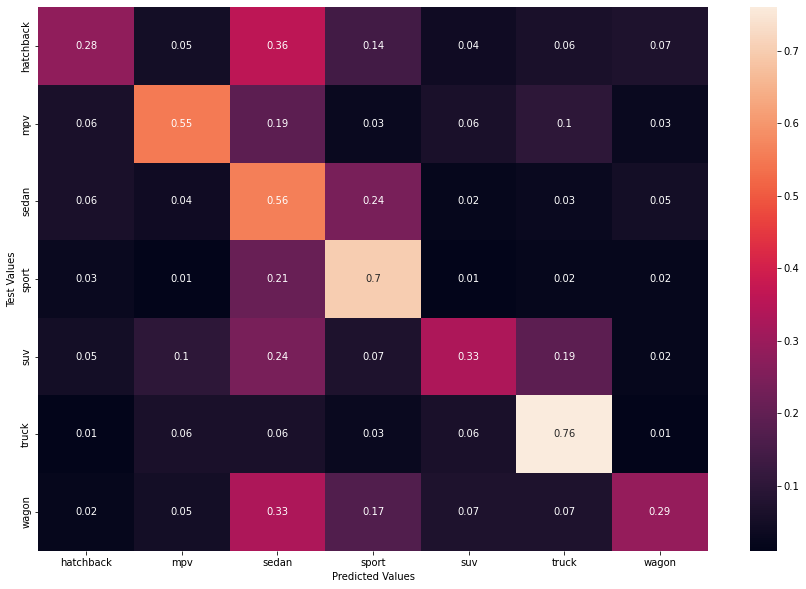

In [14]:
# compute confusion matrix
matrix = confusion_matrix(test_batches.classes, y_pred)

# normalize confusion matrix
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix = np.around(matrix, decimals=2)

# generate confusion matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(matrix, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.ylabel('Test Values')
plt.xlabel('Predicted Values')

# Compute Execution Time

In [15]:
execution_time_s = round(time.time() - start_time, 2)
execution_time_m = round(execution_time_s/60, 2)
execution_time_h = round(execution_time_m/60, 2)

print('Execution Time (Hours):', execution_time_h)
print('Execution Time (Minutes):', execution_time_m)
print('Execution Time (Seconds):', execution_time_s)

Execution Time (Hours): 3.98
Execution Time (Minutes): 238.7
Execution Time (Seconds): 14321.98
